# Ejemplo de CNN 2D en la base de datos cifar100

## RESULTADOS SIMULACIÓN CON GPU(4 MIN)


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2


In [2]:
# descargamos los datos cifar100 y los partimos en train y test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

169001437/169001437 [==============================] - 14s 0us/step


In [3]:
# Tamaño de los datos (#datos,#lado,#alto,#canales)
print(X_train.shape)

(50000, 32, 32, 3)


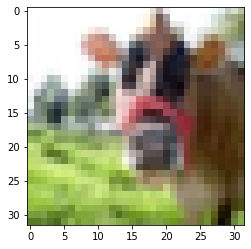

In [4]:
import matplotlib.pyplot as plt

# enseñamos la primera imagen del dataset
plt.imshow(X_train[0],cmap="gray")

In [5]:
# one-hot encoding en las 'y'
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Modelo

In [6]:
# Hacemos un modelo con varias capas

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras import regularizers

#crear modelo
model = Sequential()

#Vamos añadiendo capas
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3),
                activity_regularizer=regularizers.l1(0.2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                activity_regularizer=regularizers.l1(0.2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(16, kernel_size=3, activation='relu',
                activity_regularizer=regularizers.l1(0.2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))

In [7]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Este es el modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 32)        0

In [9]:
# Vamos a usar el callback de earlystopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

In [10]:
# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.3, epochs=50, callbacks=[early_stopping])

Epoch 1/50
1094/1094 [==============================] - 20s 11ms/step - loss: 1585.3058 - accuracy: 0.0109 - val_loss: 12.9972 - val_accuracy: 0.0098
Epoch 2/50
1094/1094 [==============================] - 10s 9ms/step - loss: 8.9477 - accuracy: 0.0102 - val_loss: 7.1126 - val_accuracy: 0.0105
Epoch 3/50
1094/1094 [==============================] - 11s 10ms/step - loss: 6.0715 - accuracy: 0.0092 - val_loss: 5.6758 - val_accuracy: 0.0095
Epoch 4/50
1094/1094 [==============================] - 12s 11ms/step - loss: 5.2478 - accuracy: 0.0106 - val_loss: 5.1357 - val_accuracy: 0.0081
Epoch 5/50
1094/1094 [==============================] - 11s 10ms/step - loss: 4.9174 - accuracy: 0.0099 - val_loss: 4.8861 - val_accuracy: 0.0097
Epoch 6/50
1094/1094 [==============================] - 11s 10ms/step - loss: 4.7676 - accuracy: 0.0107 - val_loss: 4.7616 - val_accuracy: 0.0109
Epoch 7/50
1094/1094 [==============================] - 10s 9ms/step - loss: 4.6935 - accuracy: 0.0095 - val_loss: 4.7003

In [11]:
# Evaluamos el modelo
score = model.evaluate(X_test,y_test)
score

313/313 [==============================] - 2s 5ms/step - loss: 4.6149 - accuracy: 0.0100


[4.614913463592529, 0.009999999776482582]

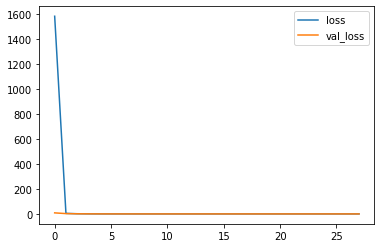

In [12]:
# Ploteamos la evolucion del loss durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure
plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.legend()


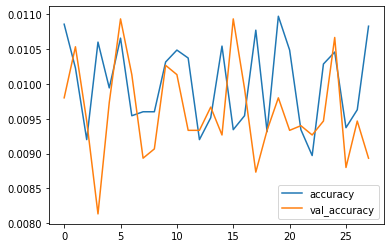

In [13]:
# Ploteamos la evolucion del accuracy durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure
plt.plot(hist.history['accuracy'],label="accuracy")
plt.plot(hist.history['val_accuracy'],label="val_accuracy")
plt.legend()


In [14]:
# Predecimos sobre test
preds_test = model.predict(X_test)
preds_test.shape

313/313 [==============================] - 1s 3ms/step


(10000, 100)

31


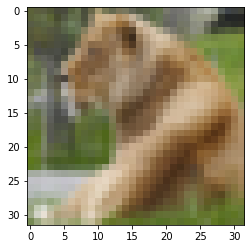

In [15]:
import numpy as np
# Elegimos una imagen de test
idx_mostrar = 2990
# Mostramos la imagen
plt.imshow(X_test[idx_mostrar,:,:,:])
# Mostramos las probabilidades que da el modelo a cada clase
print(np.argmax(preds_test[idx_mostrar]))